# 了解PCA是什麼東西

In [47]:
%pylab inline
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


## 最簡單的資料

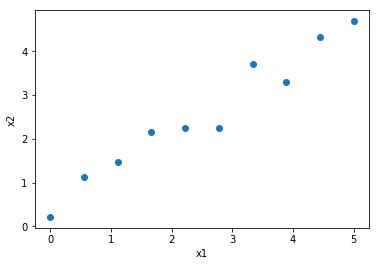

In [48]:
x1 = pd.Series(np.linspace(0, 5.0, 10))
x2 = pd.Series(x1 + np.random.randn(10) * 0.33)

plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 用熊貓組成DataFrame

In [49]:
df = pd.DataFrame({'x1':x1, 'x2':x2})
df.head()

,x1,x2
0,0.000000,0.208650
1,0.555556,1.121801
2,1.111111,1.478309
3,1.666667,2.151270
4,2.222222,2.247761


## 做feature transform

### 為什麼要做
- http://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-analysis

In [50]:
scaler = StandardScaler().fit(df)
df_scaled = scaler.transform(df)

print 'mean = %f' % (df_scaled[:, 0].mean())
print 'std = %f' % (df_scaled[:, 0].std())

mean = 0.000000
std = 1.000000


## 跑PCA

In [51]:
pca = PCA(n_components=2)
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## 每個PCA裡面要講的東西
- 每個principle component它variance的比例，variance就是eigenvalue
- component就是eigenvector (PC的方向，紅線)

variance(eigenvalue) ratio = [ 0.98796197  0.01203803] 

eigenvectors
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


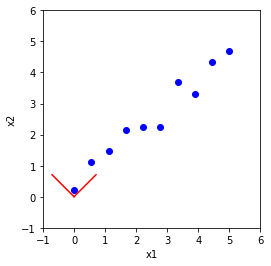

In [52]:
print 'variance(eigenvalue) ratio = %s \n' % (pca.explained_variance_ratio_)

print 'eigenvectors'
print pca.components_
plt.plot(x1, x2, 'bo')
plt.plot([0, 0.707], [0, 0.707], 'r-')
plt.plot([0, -0.707], [0, 0.707], 'r-')

plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim([-1, 6])
plt.ylim([-1, 6])
plt.axes().set_aspect('equal')

plt.show()

## covariance matrix每個東西的解釋

In [53]:
print 'covariance matrix'
print pca.get_covariance()

print '\nthe variance of x1 = %f' %  (pca.get_covariance()[0][0])

print 'the variance of x2 = %f' %  (pca.get_covariance()[1][1])

print '\nthe covariance between them = %f' %  (pca.get_covariance()[0][1])

print '\nPC1 weights = %s' % (pca.components_[0])

print 'PC2 weights = %s' % (pca.components_[1])

covariance matrix
[[ 1.          0.97592394]
 [ 0.97592394  1.        ]]

the variance of x1 = 1.000000
the variance of x2 = 1.000000

the covariance between them = 0.975924

PC1 weights = [-0.70710678 -0.70710678]
PC2 weights = [ 0.70710678 -0.70710678]


## PC的值怎麼算 (z = w1x1 + w2x2)

In [54]:
df_z_PC1 = pd.DataFrame( np.sum ( pca.components_[0] * df_scaled, axis=1), columns=['PC1'])
df_z_PC2 = pd.DataFrame( np.sum ( pca.components_[1] * df_scaled, axis=1), columns=['PC2'])
# 同上
#pcscores = pd.DataFrame(pca.transform(df_scaled))
#pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

## PC的值的分布圖

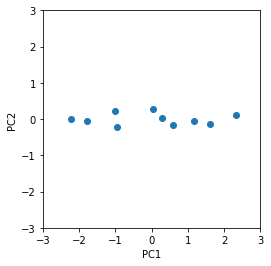

In [55]:
plt.scatter(df_z_PC1, df_z_PC2)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.axes().set_aspect('equal')

plt.show()

## 另一種PC值更簡易的算法
<http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/PCA%20(v3).pdf#page=9>

In [56]:
W = pca.components_
x = np.transpose(df_scaled)
z = np.dot(W, x)

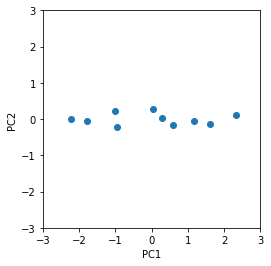

In [57]:
plt.scatter(z[0], z[1])
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.axes().set_aspect('equal')

plt.show()